In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Veriyi yükleme
data_original =pd.read_excel("D:\\verisetleri\\OnlineRetail.xlsx")

In [24]:
data=data_original.copy()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
data.info()
# Description ve CustomerID sütunlarında eksik veriler olduğunu görüyoruz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
data.isnull().sum()
# Eksik verilerin sayılarını görüyoruz

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# Eksik verilerin nerelerde ve ne gibi ilişkleri olduğuna bakalım

In [8]:
data[data['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [9]:
data[data['Description'].isnull() & data['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [10]:
data['StockCode'].nunique()

4070

In [11]:
data['Description'].nunique()

4223

In [25]:
# StockCode ve Description eşlemesini oluşturalım
stockcode_description = data.dropna(subset=['Description']).set_index('StockCode')['Description']

# Description'ı boş olan satırlara aynı StockCode'a ait olan Description'ı atayalım, sadece geçerli StockCode'lar için
def fill_description(row):
    # Eğer Description boşsa ve StockCode, stockcode_description'da varsa, dolduralım
    if pd.isnull(row['Description']) and row['StockCode'] in stockcode_description.index:
        return stockcode_description[row['StockCode']]
    else:
        return row['Description']

# Uygulama
data['Description'] = data.apply(fill_description, axis=1)

# Sonuçları kontrol edelim
data[data['Description'].isnull()]

# Bu bilgilerden çıkarım yaparsak: CustomerID değeri boş olan satırlarda, Description değeri de boş.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,2011-07-27 14:10:00,0.0,NaN,United Kingdom
281615,561555,37477B,NaN,-11,2011-07-28 10:21:00,0.0,NaN,United Kingdom
281616,561557,37477C,NaN,-31,2011-07-28 10:21:00,0.0,NaN,United Kingdom
346849,567207,35592T,NaN,4,2011-09-19 11:01:00,0.0,NaN,United Kingdom


In [26]:
data.isnull().sum()
# Ürün açıklamalarınında eksik veri sayısı azaldı.

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [39]:
datad=data.copy()
# description ile ilgli işlem yaptığımız için veri setine datad adını verdik

In [41]:
datad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541797 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
# CustomerID sütununda hala eksik veriler bulunmakta. Buradaki eksik verileri inceleyip ona göre işlem yapacağız.

In [23]:
data[data['CustomerID'].isnull()]
# CustomerID si boş olan satırlara bakalım.
# Aynı fatura numarasına sahip birden fazla satır varsa, CustomerID'yi bu satırlara atayabiliriz.
# Belki aynı fatura için müşteri numarası girilmemiş olabilir

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [213]:
datac=data.copy()

In [214]:
datac.isnull().sum()

InvoiceNo           0
StockCode           0
Description       112
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalSpent          0
dtype: int64

In [215]:
# Boş olan müşteri numaraları için kaç farklı fatura olduğuna bakıyoruz.
# Eğer bu satırları silmek istiyorsak ne kadar veri sileceğiz görebiliriz
missing_customerid = datac[datac['CustomerID'].isnull()]

# Bu satırlarda farklı fatura numaralarını say
unique_invoices_missing_customerid = missing_customerid['InvoiceNo'].nunique()

# Sonucu yazdır
print(f"Boş CustomerID olan {unique_invoices_missing_customerid} farklı fatura numarası bulunmaktadır.")

Boş CustomerID olan 3710 farklı fatura numarası bulunmaktadır.


In [216]:
# toplamda kaç farklı fatura numarası olduğunu buluyoruz.
datac['InvoiceNo'].nunique()

25900

In [217]:
# Aynı fatura numarasına sahip olan satırlarda birinde CustomerID var, diğerinde CustomerID yok ise, bu tür faturaları tespit edebiliriz.
# Sonuca baktığımızda herhangi bir sonuç alamıyoruz. 
# Bu demek oluyorki bu müşterilerin numaralarını silebiliriz.
faturalar = datac.groupby('InvoiceNo')['CustomerID'].apply(lambda x: x.isnull().any() & x.notnull().any())

# Bu faturaların InvoiceNo'larını al
invoices_with_mixed_customerid = faturalar[faturalar].index

# Bu faturalara ait tüm satırları filtrele
mixed_customerid_invoices = datac[datac['InvoiceNo'].isin(invoices_with_mixed_customerid)]
mixed_customerid_invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent


In [218]:
# CustomerID sütununu integer formatına dönüştür (float'tan integer'a)
datac['CustomerID'] = datac['CustomerID'].astype('Int64')  

In [219]:
datac = datac.dropna(subset=['CustomerID'])

In [220]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
 7   Country      406829 non-null  object        
 8   TotalSpent   406829 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 31.4+ MB


In [221]:
# InvoiceNo'yu string (metin) olarak formatlayın
datac['InvoiceNo'] = datac['InvoiceNo'].astype(str)

# Harf içeren InvoiceNo'ları filtrele
alfanumerik_invoices = datac[datac['InvoiceNo'].str.contains('[a-zA-Z]', regex=True)]

# Sonuçları görüntüle
alfanumerik_invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom,-1.25


In [222]:
# C harfini içeren ve içermeyen faturaların sayısını hesapla
c_iceriyor = datac[datac['InvoiceNo'].str.contains('C', na=False)].shape[0]
c_icermiyor = datac[~datac['InvoiceNo'].str.contains('C', na=False)].shape[0]

print(f"C harfini içeren fatura sayısı: {c_iceriyor}")
print(f"C harfini içermeyen fatura sayısı: {c_icermiyor}")

# iptal edilen fatura sayısı 8905 iken iptal edilmeyen ise 397924

C harfini içeren fatura sayısı: 8905
C harfini içermeyen fatura sayısı: 397924


In [223]:
# İptal edilen faturalar için yeni bir sutun oluşturup müşterilerin şipariş iptal sıklığı ya kaç alışverişte ne kadar siparişi iptal ettiğini görebiliriz
# FaturaDurumu adında yeni bir sütun oluştur
# Eğer InvoiceNo 'C' ile başlıyorsa 0, diğer durumlarda 1 atıyoruz
datac['FaturaDurumu'] = datac['InvoiceNo'].apply(lambda x: 0 if x.startswith('C') else 1)


In [224]:
datac.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,FaturaDurumu
427378,573384,23487,SWEET HEART CAKE CARRIER,3,2011-10-30 14:19:00,9.95,15478,United Kingdom,29.85,1
320819,565114,21830,ASSORTED CREEPY CRAWLIES,24,2011-09-01 11:15:00,0.42,13588,United Kingdom,10.08,1
134016,547816,21926,RED/CREAM STRIPE CUSHION COVER,1,2011-03-25 14:30:00,1.25,12748,United Kingdom,1.25,1
387346,570284,23234,BISCUIT TIN VINTAGE CHRISTMAS,1,2011-10-10 11:30:00,2.89,14419,United Kingdom,2.89,1
34524,539404,21528,DAIRY MAID TRADITIONAL TEAPOT,1,2010-12-17 12:24:00,6.95,17315,United Kingdom,6.95,1
151575,549560,21592,RETROSPOT CIGAR BOX MATCHES,1,2011-04-10 13:26:00,1.25,15058,United Kingdom,1.25,1
383514,570027,22727,ALARM CLOCK BAKELIKE RED,4,2011-10-07 10:41:00,3.75,14844,United Kingdom,15.00,1
472827,576736,22360,GLASS JAR ENGLISH CONFECTIONERY,12,2011-11-16 12:42:00,2.95,13089,United Kingdom,35.40,1
477534,577058,21872,GLAMOROUS MUG,1,2011-11-17 14:29:00,1.25,18122,United Kingdom,1.25,1
143706,548711,21787,RAIN PONCHO RETROSPOT,2,2011-04-03 14:24:00,0.85,18116,United Kingdom,1.70,1


In [225]:
cancelled_invoices = datac[datac['FaturaDurumu'] == 0]
cancelled_invoices['CustomerID'].nunique()


1589

In [226]:
not_cancelled_invoices = datac[datac['FaturaDurumu'] == 1]
not_cancelled_invoices['CustomerID'].nunique()

4339

In [227]:
datac['CustomerID'].nunique()
# demek ki siparişini iptal eden müşteriler var.

4372

In [228]:
# Bazı faturların numaralarında C harfi olduğunu görüyoruz. Bunları sadece sayısal olacak şeklide değiştiriryoruz.
# InvoiceNo'daki harfleri çıkar, yalnızca sayıları bırak
datac['InvoiceNo'] = datac['InvoiceNo'].str.replace('C', '', regex=True)

In [229]:
# Bir faturda bir ürüne toplam ne kadar para harcandığını bulalım.
datac["TotalSpent"] = datac["Quantity"] * datac["UnitPrice"]

In [230]:
# Veriler içinde ürünlerin fiyatı ve sayısı negatif olabilir. Bu yüzden sadece pozitif değerleri olan değerleri alacağız.
# İptal edilen faturaları filtreleyelim
cancelled_invoices = datac[datac['FaturaDurumu'] == 0]

# İptal edilen faturaların 'Quantity' ve 'TotalSpent' değerlerini pozitif yapalım
datac.loc[datac['FaturaDurumu'] == 0, 'Quantity'] = datac.loc[datac['FaturaDurumu'] == 0, 'Quantity'].abs()
datac.loc[datac['FaturaDurumu'] == 0, 'TotalSpent'] = datac.loc[datac['FaturaDurumu'] == 0, 'TotalSpent'].abs()

In [249]:
# gerçekleşen siparişleri ve ilgili sütunları kontrol edelim
cancelled_invoices_check = datac[datac['FaturaDurumu'] == 1]

# Sonuçları kontrol edelim
cancelled_invoices_check[['InvoiceNo', 'Quantity', 'TotalSpent']]

,InvoiceNo,Quantity,TotalSpent
0,536365,6,15.30
1,536365,6,20.34
2,536365,8,22.00
3,536365,6,20.34
4,536365,6,20.34
...,...,...,...
541904,581587,12,10.20
541905,581587,6,12.60
541906,581587,4,16.60
541907,581587,4,16.60


In [405]:
# İptal edilen siparişleri ve ilgili sütunları kontrol edelim
cancelled_invoices_check = datac[datac['FaturaDurumu'] == 0]

# Sonuçları kontrol edelim
cancelled_invoices_check[['InvoiceNo', 'Quantity', 'TotalSpent']]

,InvoiceNo,Quantity,TotalSpent
141,536379,1,27.50
154,536383,1,4.65
235,536391,12,19.80
236,536391,24,6.96
237,536391,24,6.96
...,...,...,...
540449,581490,11,9.13
541541,581499,1,224.69
541715,581568,5,54.75
541716,581569,1,1.25


In [38]:
# Verilerimiz temizledik. Şimdi biraz görselleştirme ile verilerimize göz gezdirelim.


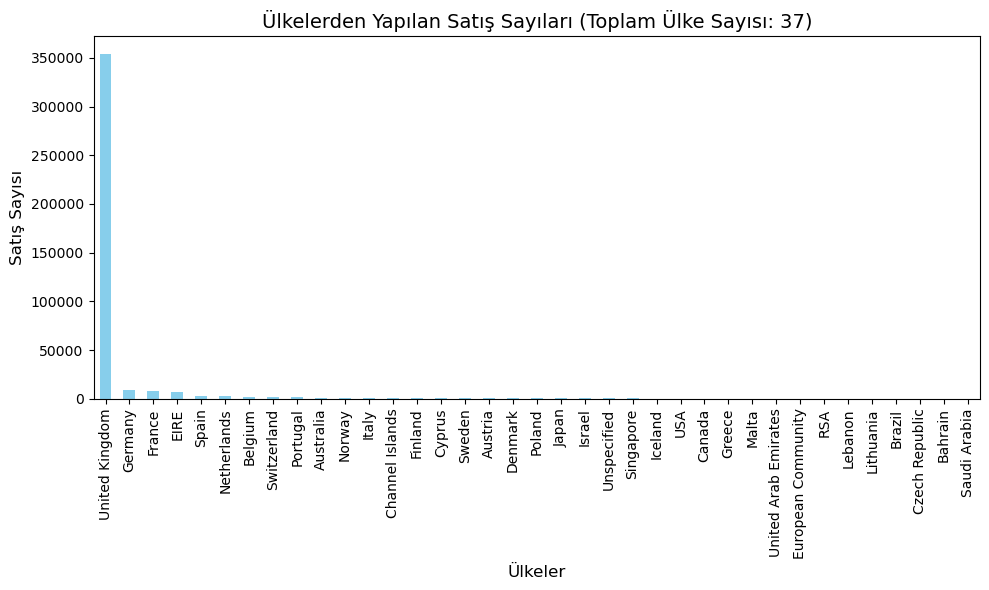

In [406]:
# Fatura durumu 1 olan satırları filtreleyelim (iptal edilmemiş siparişler)
datac_not_cancelled = datac[datac['FaturaDurumu'] == 1]

# Ülkelerden benzersiz olanları sayalım (sadece iptal edilmemiş siparişler)
country_sales = datac_not_cancelled['Country'].value_counts()
countries = datac_not_cancelled['Country'].nunique()

# Görselleştirme
plt.figure(figsize=(10, 6))
country_sales.plot(kind='bar', color='skyblue')

# Başlık ve etiketler
plt.title(f'Ülkelerden Yapılan Satış Sayıları (Toplam Ülke Sayısı: {countries})', fontsize=14)
plt.ylabel('Satış Sayısı', fontsize=12)
plt.xlabel('Ülkeler', fontsize=12)

# Grafiği göster
plt.tight_layout()
plt.show()


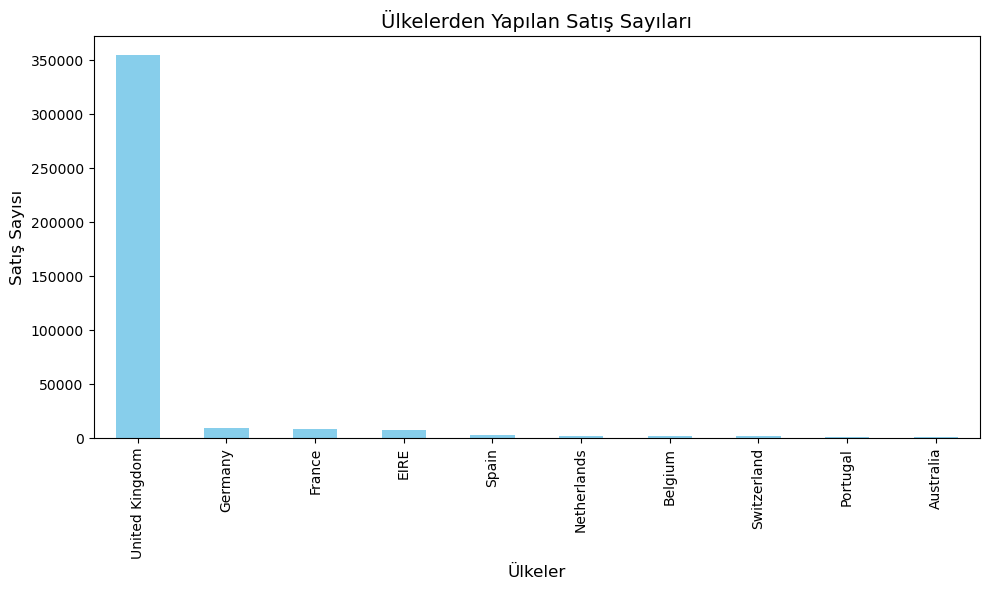

In [407]:
# en çok satış yapılan 10 ülke
plt.figure(figsize=(10, 6))
country_sales.head(10).plot(kind='bar', color='skyblue')

# Başlık ve etiketler
plt.title('Ülkelerden Yapılan Satış Sayıları', fontsize=14)
plt.ylabel('Satış Sayısı', fontsize=12)
plt.xlabel('Ülkeler', fontsize=12)

# Grafiği göster
plt.tight_layout()
plt.show()

In [408]:
# Müşteri başına benzersiz fatura durumu sayısını alalım
customer_invoice_status = datac.groupby('CustomerID')['FaturaDurumu'].max()  # 0 veya 1 değerini alır

# Sipariş iptal etmiş (FaturaDurumu == 0) ve etmemiş (FaturaDurumu == 1) olan müşterileri filtreleyelim
cancelled_orders = customer_invoice_status[customer_invoice_status == 0].count()
not_cancelled_orders = customer_invoice_status[customer_invoice_status == 1].count()

# Sonuçları yazdıralım
print(f"Kaç kullanıcı sipariş iptal etmiş: {cancelled_orders}")
print(f"Kaç kullanıcı sipariş iptal etmemiş: {not_cancelled_orders}")

# burada 33 müşterinin hem iptal edilmiş hem gerçekleşmiş siparişi odluğunu buluyoruz.

Kaç kullanıcı sipariş iptal etmiş: 33
Kaç kullanıcı sipariş iptal etmemiş: 4339


In [409]:
# Müşteri başına benzersiz fatura durumu alalım
customer_invoice_status = datac.groupby('CustomerID')['FaturaDurumu'].max()

# Sipariş iptal etmiş müşterileri filtreleyelim (FaturaDurumu == 0)
cancelled_customers = customer_invoice_status[customer_invoice_status == 0].index

# İptal edilen siparişlere sahip müşterileri görüntüleyelim
cancelled_customers_data = datac[datac['CustomerID'].isin(cancelled_customers)]

# Sonuçları kontrol edelim
print(f"İptal edilen siparişlere sahip {len(cancelled_customers_data['CustomerID'].unique())} müşteri var.")


İptal edilen siparişlere sahip 33 müşteri var.


In [410]:
datac.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,FaturaDurumu
479423,577159,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2011-11-18 09:58:00,7.95,15406,United Kingdom,7.95,0
421805,573027,21535,RED RETROSPOT SMALL MILK JUG,6,2011-10-27 13:26:00,2.55,18225,United Kingdom,15.30,1
210511,555282,22243,5 HOOK HANGER RED MAGIC TOADSTOOL,12,2011-06-02 09:04:00,1.65,12709,Germany,19.80,1
289528,562269,20726,LUNCH BAG WOODLAND,2,2011-08-03 16:35:00,1.65,14056,United Kingdom,3.30,1
17804,537775,22181,SNOWSTORM PHOTO FRAME FRIDGE MAGNET,12,2010-12-08 12:41:00,0.85,17722,United Kingdom,10.20,1


In [411]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  Int64         
 7   Country       406829 non-null  object        
 8   TotalSpent    406829 non-null  float64       
 9   FaturaDurumu  406829 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 34.5+ MB


In [412]:
# 1 ürün almış müşterileri seçelim
one_product_customers = datac.groupby('CustomerID')['Quantity'].sum() == 1

# Bu müşterilerin sadece iptal edilmiş (FaturaDurumu == 0) siparişlerini alalım
cancelled_orders = datac[datac['FaturaDurumu'] == 0]

# Sadece bir ürün almış ve o ürünü iptal etmiş müşterileri bulalım
one_product_cancelled_customers = cancelled_orders[cancelled_orders['CustomerID'].isin(one_product_customers[one_product_customers].index)]

# Bu müşteri ID'lerini listeleyelim
cancelled_customer_ids = one_product_cancelled_customers['CustomerID'].unique()

# Sonuçları yazdıralım
cancelled_customer_ids


<IntegerArray>
[16995, 14679, 16138, 12503, 12505, 12943, 15590, 16061, 17448, 15369, 13154,
 17065, 16428]
Length: 13, dtype: Int64

In [413]:
# sadece iptal edilmiş siparişi olan bir müşteri
datac[datac['CustomerID'] == 16428]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,FaturaDurumu
347966,567358,22699,ROSES REGENCY TEACUP AND SAUCER,1,2011-09-19 16:31:00,2.95,16428,United Kingdom,2.95,0


In [414]:
# FaturaDurumu 0 olan ve sadece o ürünle ilgili bir satırı olan müşterileri bulalım
single_cancelled_orders = datac[datac['FaturaDurumu'] == 0]

# Bu satırları sadece bir kez sipariş veren (aynı StockCode'dan sadece bir sipariş veren) ve sadece o ürünle ilgili bir iptal işlemi yapmış olan müşteriler
single_cancelled_orders_customers = single_cancelled_orders.groupby('CustomerID')['StockCode'].nunique() == 1
single_cancelled_orders_customers = single_cancelled_orders_customers[single_cancelled_orders_customers].index

# Bu müşterilerin verilerini silmek
cleaned_data = datac[~datac['CustomerID'].isin(single_cancelled_orders_customers)]

In [415]:
# Temizlenmiş veriyi kontrol et
cleaned_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSpent,FaturaDurumu
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,1
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,1


In [ ]:
# RFM 

In [416]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362381 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     362381 non-null  object        
 1   StockCode     362381 non-null  object        
 2   Description   362381 non-null  object        
 3   Quantity      362381 non-null  int64         
 4   InvoiceDate   362381 non-null  datetime64[ns]
 5   UnitPrice     362381 non-null  float64       
 6   CustomerID    362381 non-null  Int64         
 7   Country       362381 non-null  object        
 8   TotalSpent    362381 non-null  float64       
 9   FaturaDurumu  362381 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.8+ MB


In [501]:
# RFM hesaplamalarını yapalım
# Bu adımda 'TotalSpent' verisini kullanarak Frequency ve Monetary'yi hesaplayacağız.

# Güncel tarihi otomatik olarak al
today = pd.to_datetime('today')

# Frequency: Her bir müşteri için toplamda kaç sipariş yapılmış
frequency = cleaned_data.groupby('CustomerID').size()

# Monetary: Müşterilerin toplam harcaması (TotalSpent'yi kullanarak hesapla)
monetary = cleaned_data.groupby('CustomerID')['TotalSpent'].sum()

# Recency: En son siparişin tarihi (en son alınan siparişi kullanarak hesapla)
recency = cleaned_data.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (today - x).days)

# RFM DataFrame'ini oluşturma
rfm = pd.DataFrame({
    'CustomerID': recency.index,  # CustomerID'yi ekliyoruz
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

# RFM tablosunu inceleyelim
rfm


,CustomerID,Recency,Frequency,Monetary
0,12347,4727,182,4310.00
1,12348,4800,31,1797.24
2,12349,4743,73,1757.55
3,12350,5035,17,334.40
4,12352,4761,95,3466.67
...,...,...,...,...
3839,18278,4798,9,173.90
3840,18280,5002,10,180.60
3841,18281,4905,7,80.82
3842,18283,4728,756,2094.88


In [502]:
# Recency, Frequency, ve Monetary için segmentasyon
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 5, labels=False, duplicates='drop') + 1
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'], 5, labels=False, duplicates='drop') + 1
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 5, labels=False, duplicates='drop') + 1

# Toplam RFM Skoru oluşturma (Recency + Frequency + Monetary)
rfm['RFM_Total'] = rfm['Recency_Score'] + rfm['Frequency_Score'] + rfm['Monetary_Score']
# Recency, Frequency ve Monetary skorlarını birleştirip toplam bir RFM skoru oluşturma
rfm['RFM_Score'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) + rfm['Monetary_Score'].astype(str)

# Sonuçları inceleyelim
rfm


,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Total,RFM_Score
0,12347,4727,182,4310.00,1,5,5,11,155
1,12348,4800,31,1797.24,4,3,4,11,434
2,12349,4743,73,1757.55,2,4,4,10,244
3,12350,5035,17,334.40,5,2,2,9,522
4,12352,4761,95,3466.67,3,4,5,12,345
...,...,...,...,...,...,...,...,...,...
3839,18278,4798,9,173.90,4,1,1,6,411
3840,18280,5002,10,180.60,5,1,1,7,511
3841,18281,4905,7,80.82,4,1,1,6,411
3842,18283,4728,756,2094.88,1,5,5,11,155


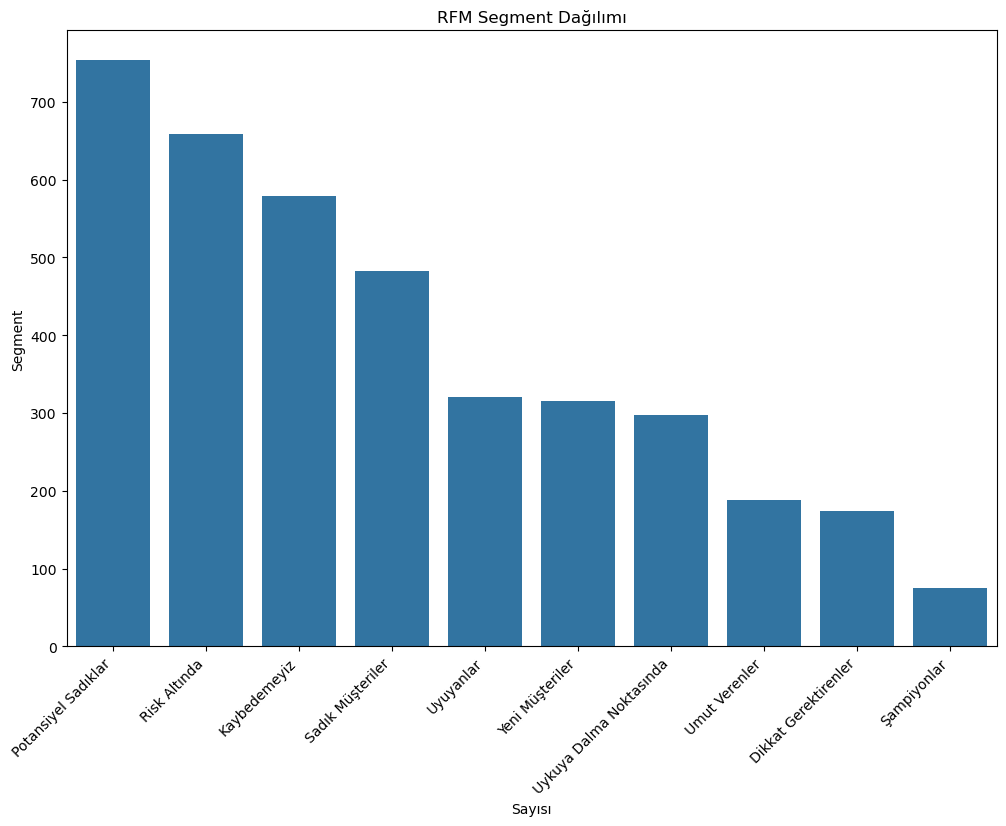

In [424]:
# RFM skorlarına göre müşteri segmentlerini tanımlama
segt_map = {
    r'[1-2][1-2]': 'Uyuyanlar',              # Hibernating
    r'[1-2][3-4]': 'Risk Altında',           # At Risk
    r'[1-2]5': 'Kaybedemeyiz',               # Can’t Lose
    r'3[1-2]': 'Uykuya Dalma Noktasında',    # About To Sleep
    r'33': 'Dikkat Gerektirenler',           # Need Attention
    r'[3-4][4-5]': 'Sadık Müşteriler',       # Loyal Customers
    r'41': 'Umut Verenler',                  # Promising
    r'51': 'Yeni Müşteriler',                # New Customers
    r'[4-5][2-3]': 'Potansiyel Sadıklar',    # Potential Loyalists
    r'5[4-5]': 'Şampiyonlar'                 # Champions
}
rfm['Segment'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)

# Segment sayılarını görselleştirme
plt.figure(figsize=(12, 8))
sns.countplot(x='Segment', data=rfm, order = rfm['Segment'].value_counts().index)
plt.title('RFM Segment Dağılımı')
plt.xlabel('Sayısı')
plt.ylabel('Segment')
plt.xticks(rotation=45, ha='right')
plt.show()

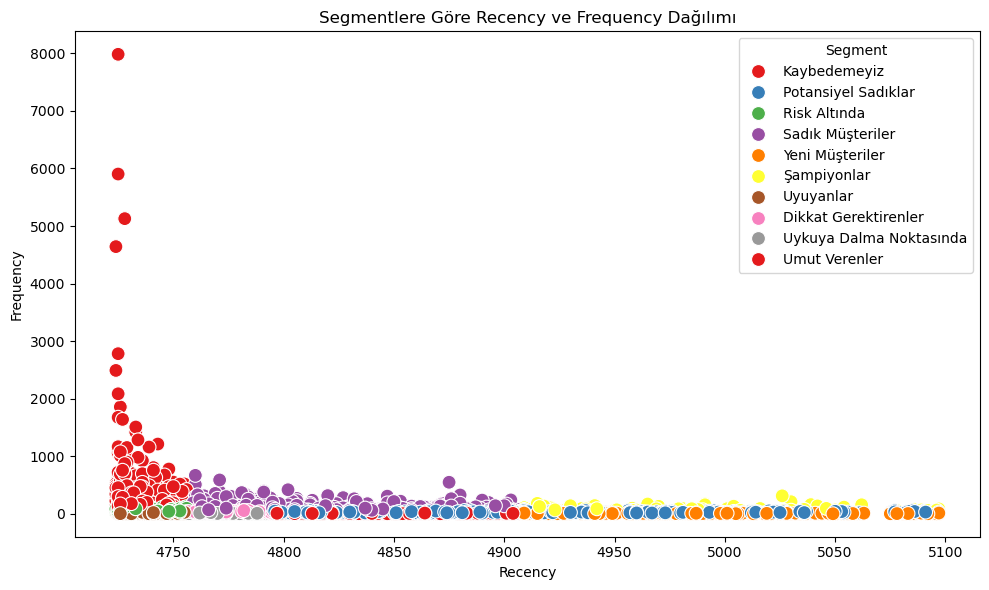

In [425]:
# Segmentlerin Recency ve Frequency'ye göre dağılımını görelim
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment', palette='Set1', s=100)
plt.title('Segmentlere Göre Recency ve Frequency Dağılımı')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


In [426]:
# RFM verilerini seçelim (Recency, Frequency, Monetary)
rfm_data = rfm[['Recency', 'Frequency', 'Monetary']]

# Veriyi ölçeklendirelim (K-Means için önemli)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Veriyi kontrol edelim
print(rfm_scaled[:5])


[[-0.89583475  0.35855388  0.26903647]
 [-0.1756581  -0.2585985  -0.0288696 ]
 [-0.73798781 -0.08694023 -0.03357514]
 [ 2.14271878 -0.31581793 -0.20229998]
 [-0.56041001  0.00297601  0.16905353]]


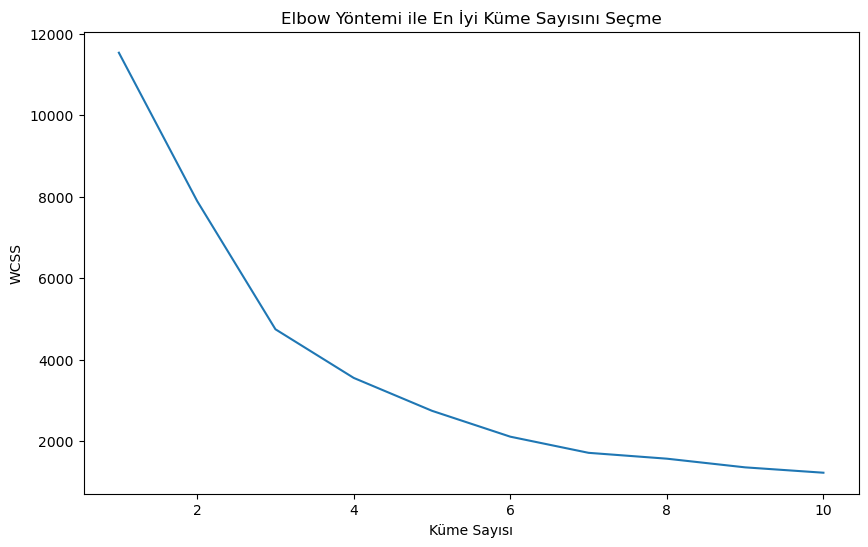

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Total,RFM_Score,Cluster
0,12347,4727,182,4310.00,1,5,5,11,155,0
1,12348,4800,31,1797.24,4,3,4,11,434,0
2,12349,4743,73,1757.55,2,4,4,10,244,0
3,12350,5035,17,334.40,5,2,2,9,522,2
4,12352,4761,95,3466.67,3,4,5,12,345,0
5,12353,4929,4,89.00,5,1,1,7,511,2
6,12354,4957,58,1079.40,5,4,4,13,544,2
7,12355,4939,13,459.40,5,1,2,8,512,2
8,12356,4747,59,2811.43,2,4,5,11,245,0
9,12357,4758,131,6207.67,3,5,5,13,355,0


In [503]:
# Elbow Yöntemi ile en uygun küme sayısını bulma
wcss = []  # within-cluster sum of squares (WCSS) listesi
for i in range(1, 11):  # 1'den 10'a kadar dene
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Elbow Grafiğini çizelim
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Yöntemi ile En İyi Küme Sayısını Seçme')
plt.xlabel('Küme Sayısı')
plt.ylabel('WCSS')
plt.show()

# Elbow grafiğinden en uygun küme sayısını belirleyip K-means uygulayalım
optimal_clusters = 4  # Örneğin, Elbow grafiğine bakarak 4 küme seçelim
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Küme etiketlerini inceleyelim
rfm.head(10)

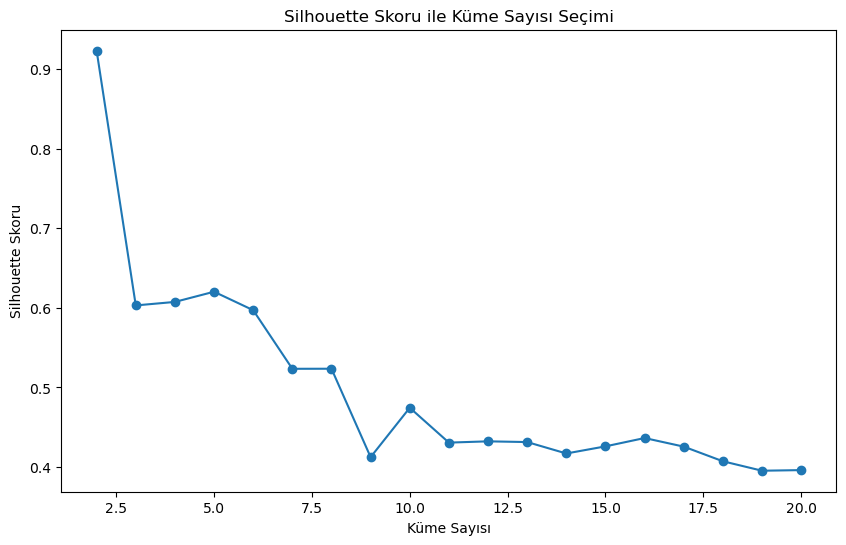

In [466]:
sil_scores = []
for i in range(2, 21):  # Küme sayısı 2'den 10'a kadar deneyelim
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=21, random_state=42)
    kmeans.fit(rfm_scaled)
    sil_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Silhouette Skorunu yazdıralım
plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), sil_scores, marker='o')
plt.title('Silhouette Skoru ile Küme Sayısı Seçimi')
plt.xlabel('Küme Sayısı')
plt.ylabel('Silhouette Skoru')
plt.show()

In [504]:
from sklearn.cluster import KMeans
# K-Means algoritmasını uygulayalım (K=5 ile başlıyoruz)
kmeans = KMeans(n_clusters=5, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Küme merkezlerini ve küme etiketlerini kontrol edelim
print(kmeans.cluster_centers_)
print(rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']].head(10))


[[-0.79177618  1.43101241  0.829806  ]
 [-0.48140698 -0.10247561 -0.0954913 ]
 [ 1.55565806 -0.27202448 -0.18491642]
 [-0.90076746 23.78582171  8.89573748]
 [-0.52929595  3.16639285 12.55574495]]
   Recency  Frequency  Monetary  Cluster
0     4727        182   4310.00        1
1     4800         31   1797.24        1
2     4743         73   1757.55        1
3     5035         17    334.40        2
4     4761         95   3466.67        1
5     4929          4     89.00        2
6     4957         58   1079.40        2
7     4939         13    459.40        2
8     4747         59   2811.43        1
9     4758        131   6207.67        1


In [473]:
# Kümeleme sonrası her küme için ortalama değerleri hesaplayalım
cluster_summary = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()

# Sonuçları görselleştirelim
print(cluster_summary)


             Recency    Frequency       Monetary
Cluster                                         
0        4736.547794   444.400735    9039.944706
1        4767.968114    69.204764    1235.120846
2        4974.385504    27.742647     482.317153
3        4725.500000  5914.000000   77073.972500
4        4763.153846   869.000000  107945.180769


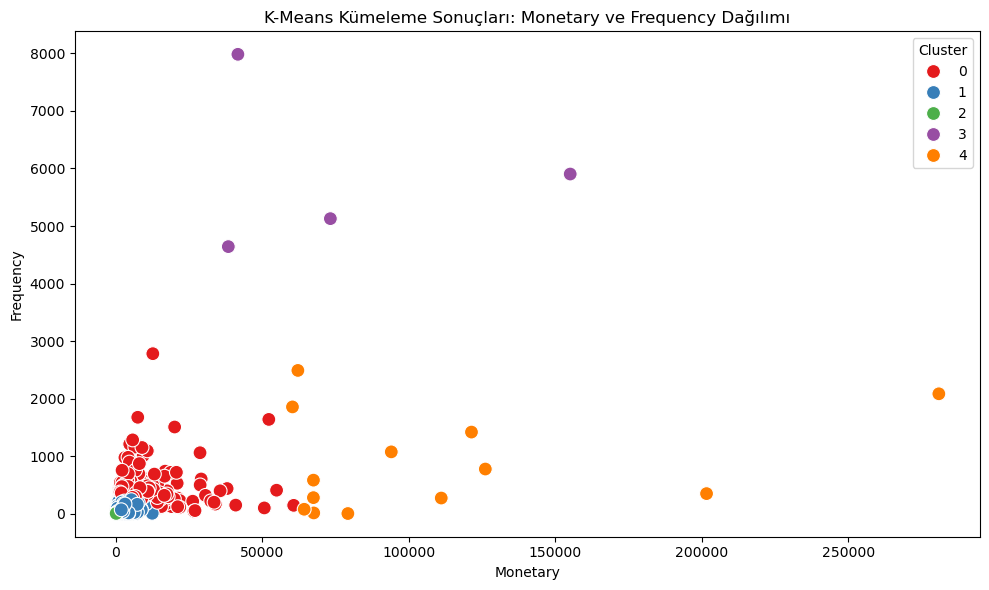

In [477]:
# Kümeleme sonuçlarını görselleştirelim
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Monetary'], y=rfm['Frequency'], hue=rfm['Cluster'], palette='Set1', s=100)
plt.title('K-Means Kümeleme Sonuçları: Monetary ve Frequency Dağılımı')
plt.xlabel('Monetary')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


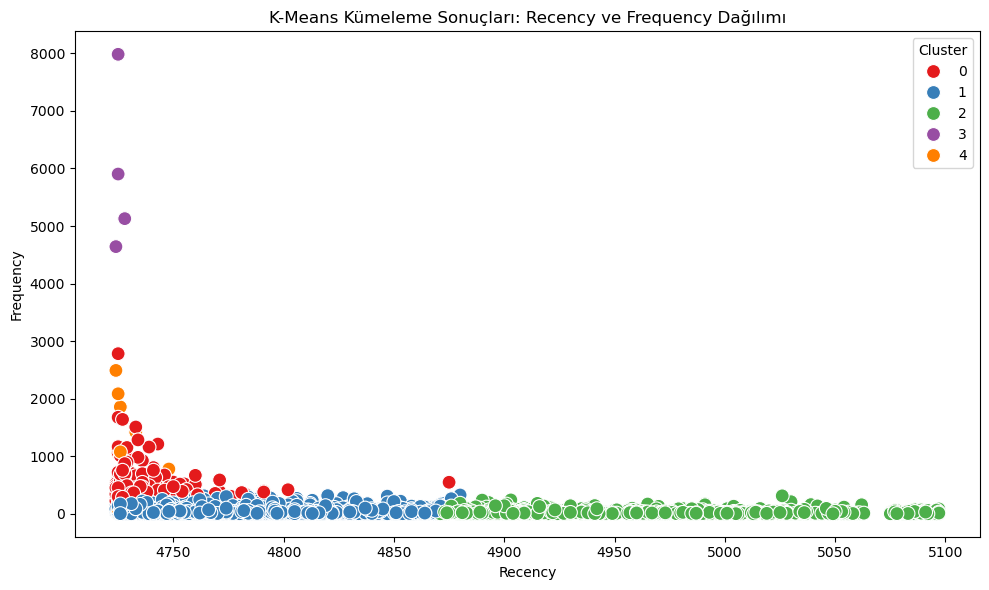

In [476]:
# Kümeleme sonuçlarını görselleştirelim
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Frequency'], hue=rfm['Cluster'], palette='Set1', s=100)
plt.title('K-Means Kümeleme Sonuçları: Recency ve Frequency Dağılımı')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


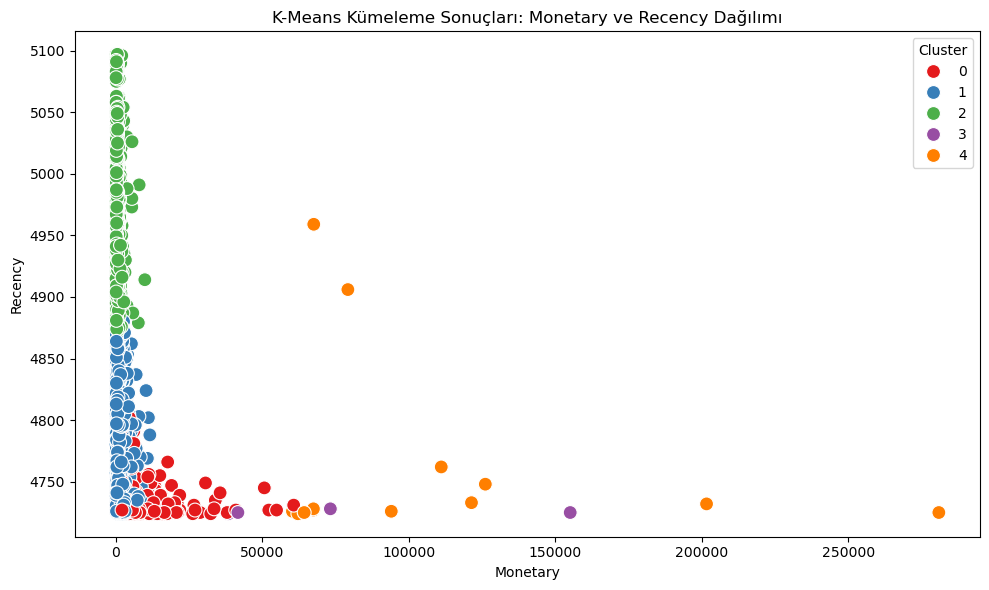

In [475]:
# Kümeleme sonuçlarını görselleştirelim
plt.figure(figsize=(10, 6))
sns.scatterplot(x=rfm['Monetary'], y=rfm['Recency'], hue=rfm['Cluster'], palette='Set1', s=100)
plt.title('K-Means Kümeleme Sonuçları: Monetary ve Recency Dağılımı')
plt.xlabel('Monetary')
plt.ylabel('Recency')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [512]:
# Benzersiz fatura numaralarını elde etme (aynı fatura numarası olan satırları birleştiriyoruz)
unique_invoices = cleaned_data.drop_duplicates(subset=['CustomerID', 'InvoiceNo'])

# Veriyi müşteri ve tarih sırasına göre sıralama
unique_invoices = unique_invoices.sort_values(by=['CustomerID', 'InvoiceDate'])

# Faturalar arasındaki gün farkını hesaplama
unique_invoices['DaysBetweenInvoices'] = unique_invoices.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# NaN değerlerini 0.5 ile doldurma (ilk fatura için)
unique_invoices['DaysBetweenInvoices'] = unique_invoices['DaysBetweenInvoices'].fillna(0.5)

# Her müşteri için bütün siparişleri arasındaki gün farklarının ortalamasını hesaplama
average_days_per_customer = unique_invoices.groupby('CustomerID')['DaysBetweenInvoices'].mean().reset_index()

# Sadece CustomerID ve ortalama gün sayısını içeren bir tablo oluşturuyoruz
average_days_per_customer = average_days_per_customer.rename(columns={'DaysBetweenInvoices': 'AverageDaysBetweenOrders'})

# Sonuçları görüntüleme
average_days_per_customer.head()


,CustomerID,AverageDaysBetweenOrders
0,12347,51.785714
1,12348,70.625000
2,12349,0.500000
3,12350,0.500000
4,12352,23.500000


In [589]:
# 'CustomerID' sütunu ile cleaned_data ve rfm_data veri setlerini birleştirebiliriz
rfm_columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary','Recency_Score','Frequency_Score', 'Monetary_Score', 'RFM_Score', 'Cluster']
average_days_per_customer_columns = ['CustomerID', 'AverageDaysBetweenOrders']

# RFM ve cleaned_data'yi birleştiriyoruz
merged_data = pd.merge(average_days_per_customer[average_days_per_customer_columns], 
                       rfm[rfm_columns], 
                       on='CustomerID', 
                       how='left')

merged_data['Target'] = merged_data['AverageDaysBetweenOrders'].apply(lambda x: 1 if x < 60 else 0)

merged_data_1 =merged_data.copy()
# Sonuçları görüntüleyelim
merged_data_1.sample(10)



,CustomerID,AverageDaysBetweenOrders,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Cluster,Target
2662,16445,0.500000,4758,63,230.51,3,4,1,341,1,1
3619,17925,0.500000,5097,1,244.08,5,1,2,512,2,1
603,13253,91.250000,4881,36,1030.40,4,3,4,434,2,0
3666,17995,0.500000,5006,2,76.10,5,1,1,511,2,1
3571,17857,14.100000,4728,56,26994.74,1,3,5,135,0,1
2247,15806,76.833333,4771,31,784.58,3,3,3,333,1,0
1360,14457,0.500000,5035,4,113.64,5,1,1,511,2,1
1592,14803,43.166667,4887,44,845.55,4,3,3,433,2,1
2711,16523,10.767857,4726,298,9541.27,1,5,5,155,0,1
3203,17302,48.083333,4739,81,1151.33,2,4,4,244,1,1


In [ ]:
# MODEL OLUŞTURMA

In [590]:
# Hedef ve özellikleri ayıralım
# Özellikler ve hedef değişken
X = merged_data[['Recency_Score','Frequency_Score', 'Monetary_Score', 'AverageDaysBetweenOrders', 'Cluster']]
y = merged_data['Target']

# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler ile verileri standartlaştırma
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Eğitim verisini fit ve transform et
X_test_scaled = scaler.transform(X_test)  # Test verisini sadece transform et

In [591]:
# Lojistik Regresyon Modeli oluşturma
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

# Modeli test etme
y_pred = model_lr.predict(X_test_scaled)

# Sonuçları değerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[109   5]
 [  0 655]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       114
           1       0.99      1.00      1.00       655

    accuracy                           0.99       769
   macro avg       1.00      0.98      0.99       769
weighted avg       0.99      0.99      0.99       769



In [592]:
# Rastgele Orman Modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Modeli test etme
y_pred = rf_model.predict(X_test_scaled)

# Sonuçları değerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[114   0]
 [  0 655]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       655

    accuracy                           1.00       769
   macro avg       1.00      1.00      1.00       769
weighted avg       1.00      1.00      1.00       769



In [593]:
# XGBoost Modeli
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Modeli test etme
y_pred = xgb_model.predict(X_test_scaled)

# Sonuçları değerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[112   2]
 [  1 654]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       114
           1       1.00      1.00      1.00       655

    accuracy                           1.00       769
   macro avg       0.99      0.99      0.99       769
weighted avg       1.00      1.00      1.00       769



In [ ]:
# En iyi sonucu XGBoost ve Rastgele Orman Modeli elde etti

In [ ]:
# Çok sınıflı model oluşturma
# Burada müşterilerin sipariş sıklıklarını 5 farklı kategoriye ayırdık
# Siparişler arası ortalama gün sayısı 30 dan az, 30 - 45 gün arası, 45 - 60 gün arası, 60 - 90 gün arası ve 90 günden fazla olmak üzere

In [594]:
# Kategorilere ayırma: 30 günden az, 30-45 gün, 45-60 gün, 60-90,90 günden falza
bins = [0, 30, 45, 60, 90, float('inf')]  # Sınıflar: 0-30, 30-45, 45-60, 60-90, 90+
labels = [0, 1, 2, 3, 4]  # 0 = 0-30 gün, 1 = 30-45 gün, 2 = 45-60 gün, 3 = 60-90 gün, 4 = 90+ gün
merged_data['DaysCategory'] = pd.cut(merged_data['AverageDaysBetweenOrders'], bins=bins, labels=labels)

# Target değişkeni olarak 'DaysCategory' kullan
merged_data['Target'] = merged_data['DaysCategory']

merged_data_2=merged_data.copy()

In [595]:
merged_data_2.sample(10)

,CustomerID,AverageDaysBetweenOrders,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Cluster,Target,DaysCategory
1920,15314,0.500000,4924,24,327.97,5,2,2,522,2,0,0
2202,15732,79.750000,4937,14,294.12,5,2,2,522,2,3,3
3300,17440,19.700000,4872,8,195.74,4,1,1,411,2,0,0
2417,16079,7.833333,4741,21,1352.00,2,2,4,224,1,0,0
1653,14901,35.750000,4736,98,1427.59,1,4,4,144,1,1,1
2503,16205,37.125000,4755,98,761.38,2,4,3,243,1,1,1
749,13482,0.500000,4957,11,184.64,5,1,1,511,2,0,0
1790,15119,0.500000,4970,14,266.40,5,2,2,522,2,0,0
3811,18229,17.525000,4736,164,7276.90,1,5,5,155,1,0,0
3773,18173,46.625000,4811,31,2106.84,4,3,5,435,1,2,2


In [596]:
features = ['Recency_Score', 'Frequency_Score', 'Monetary_Score','Cluster', 'AverageDaysBetweenOrders']
X = merged_data_2[features]
y = merged_data_2['Target']

In [597]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [598]:
# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBoost modelini oluşturma
xgb_model = xgb.XGBClassifier(random_state=42)

# Modeli eğitme
xgb_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = xgb_model.predict(X_test)

# Sonuçları değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[485   0   0   0   0]
 [  0  89   1   0   0]
 [  0   1  78   1   0]
 [  0   0   2  70   0]
 [  0   0   0   0  42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       0.99      0.99      0.99        90
           2       0.96      0.97      0.97        80
           3       0.99      0.97      0.98        72
           4       1.00      1.00      1.00        42

    accuracy                           0.99       769
   macro avg       0.99      0.99      0.99       769
weighted avg       0.99      0.99      0.99       769



In [599]:
# RandomForestClassifier modelini oluşturma
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

# Modeli eğitme
rf_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = rf_model.predict(X_test)

# Sonuçları değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[485   0   0   0   0]
 [  0  90   0   0   0]
 [  0   0  80   0   0]
 [  0   0   2  70   0]
 [  0   0   0   1  41]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       1.00      1.00      1.00        90
           2       0.98      1.00      0.99        80
           3       0.99      0.97      0.98        72
           4       1.00      0.98      0.99        42

    accuracy                           1.00       769
   macro avg       0.99      0.99      0.99       769
weighted avg       1.00      1.00      1.00       769



In [600]:
# LightGBM modelini oluşturma
lgb_model = lgb.LGBMClassifier(random_state=42)

# Modeli eğitme
lgb_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = lgb_model.predict(X_test)

# Sonuçları değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 278
[LightGBM] [Info] Number of data points in the train set: 3075, number of used features: 5
[LightGBM] [Info] Start training from score -0.434668
[LightGBM] [Info] Start training from score -2.077817
[LightGBM] [Info] Start training from score -2.513607
[LightGBM] [Info] Start training from score -2.399848
[LightGBM] [Info] Start training from score -2.889397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [601]:
# KNN modelini oluşturma
knn_model = KNeighborsClassifier(n_neighbors=5)  # k = 5

# Modeli eğitme
knn_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = knn_model.predict(X_test)

# Sonuçları değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[482   3   0   0   0]
 [ 12  78   0   0   0]
 [  2  22  54   2   0]
 [  0   1   8  63   0]
 [  0   0   0   7  35]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       485
           1       0.75      0.87      0.80        90
           2       0.87      0.68      0.76        80
           3       0.88      0.88      0.88        72
           4       1.00      0.83      0.91        42

    accuracy                           0.93       769
   macro avg       0.89      0.85      0.87       769
weighted avg       0.93      0.93      0.92       769



In [602]:
# SVM modelini oluşturma (RBF Kernel kullanarak)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Modeli eğitme
svm_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = svm_model.predict(X_test)

# Sonuçları değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[481   4   0   0   0]
 [  5  84   1   0   0]
 [  0  10  70   0   0]
 [  0   0   3  69   0]
 [  0   0   0   6  36]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       485
           1       0.86      0.93      0.89        90
           2       0.95      0.88      0.91        80
           3       0.92      0.96      0.94        72
           4       1.00      0.86      0.92        42

    accuracy                           0.96       769
   macro avg       0.94      0.92      0.93       769
weighted avg       0.96      0.96      0.96       769



In [603]:
# Naive Bayes modelini oluşturma
nb_model = GaussianNB()

# Modeli eğitme
nb_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = nb_model.predict(X_test)

# Sonuçları değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[460  25   0   0   0]
 [  4  85   1   0   0]
 [  0   4  75   1   0]
 [  0   0   3  67   2]
 [  0   0   0   1  41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       485
           1       0.75      0.94      0.83        90
           2       0.95      0.94      0.94        80
           3       0.97      0.93      0.95        72
           4       0.95      0.98      0.96        42

    accuracy                           0.95       769
   macro avg       0.92      0.95      0.93       769
weighted avg       0.95      0.95      0.95       769



In [ ]:
# En iyi sokru XGBoost modeli aldı

[[114   0]
 [  0 655]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00       655

    accuracy                           1.00       769
   macro avg       1.00      1.00      1.00       769
weighted avg       1.00      1.00      1.00       769

Yüksek Satın Alma Eğilimli Grup İstatistikleri:
       Recency_Score  Frequency_Score  Monetary_Score     Cluster  \
count     655.000000       655.000000      655.000000  655.000000   
mean        3.012214         3.050382        3.083969    1.210687   
std         1.426005         1.461712        1.460165    0.621881   
min         1.000000         1.000000        1.000000    0.000000   
25%         2.000000         2.000000        2.000000    1.000000   
50%         3.000000         3.000000        3.000000    1.000000   
75%         4.000000         4.000000        4.000000    2.000000   
max         5.000000         5.000000        5.000

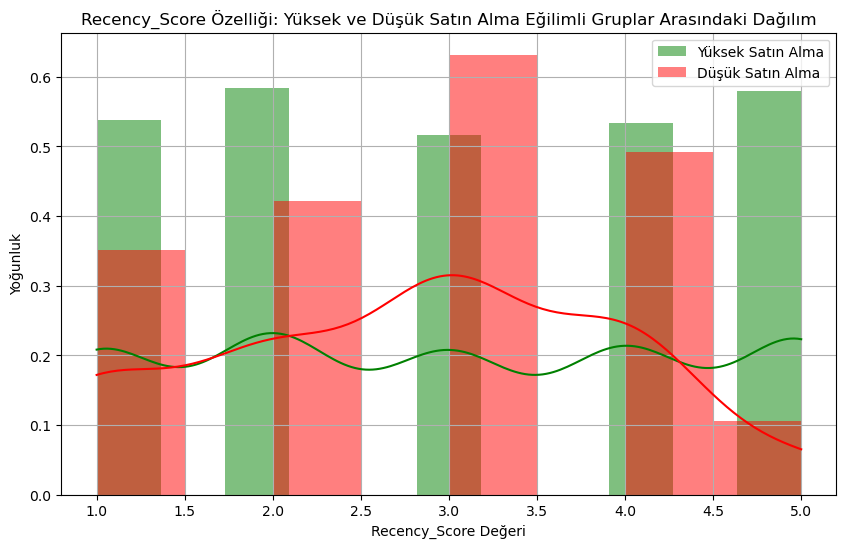

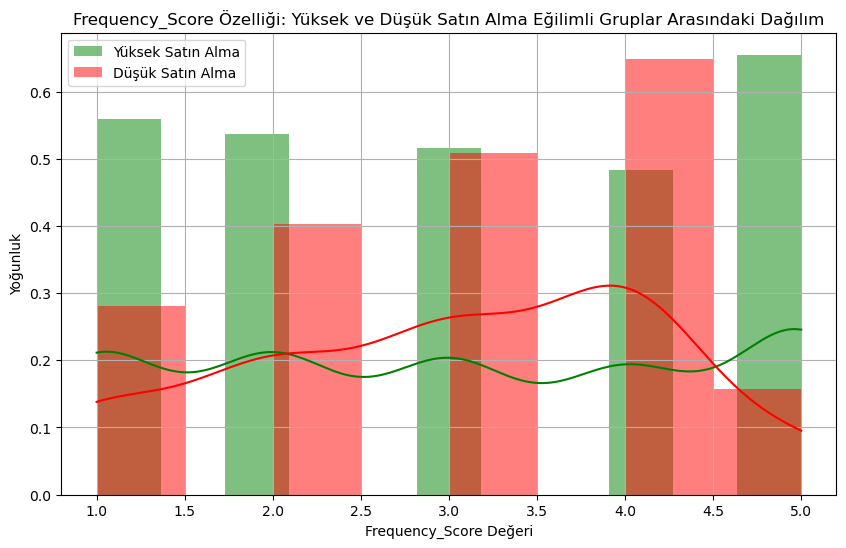

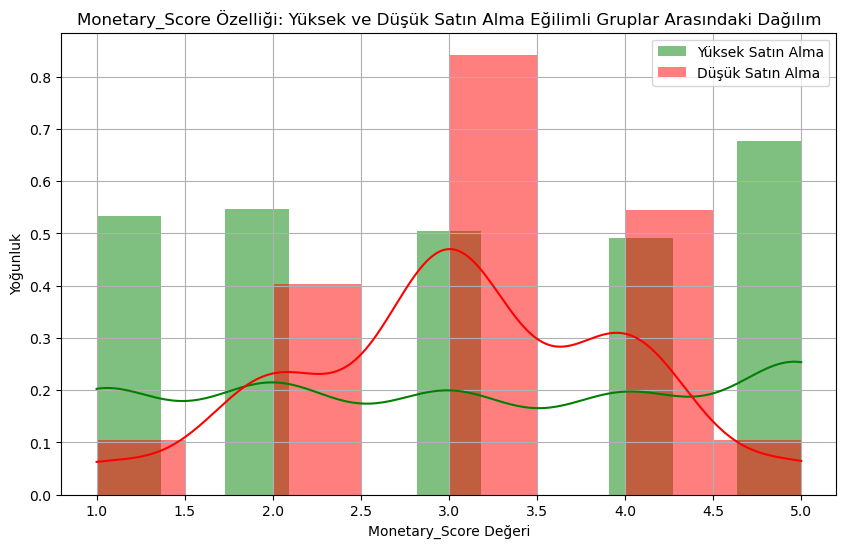

T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = 0.3484086030572621, p-değeri = 0.7276289501051165
T-test Sonucu: 'Recency_Score' Özelliği için: t-istatistiği = 1.5796120132496527, p-değeri = 0.11460803326415976
T-test Sonucu: 'Frequency_Score' Özelliği için: t-istatistiği = 0.3484086030572621, p-değeri = 0.7276289501051165
T-test Sonucu: 'Monetary_Score' Özelliği için: t-istatistiği = 0.0973327408753672, p-değeri = 0.9224875838490101


In [604]:
# Özellikler ve hedef değişkeni ayarlayın
X = merged_data_1[['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Cluster', 'AverageDaysBetweenOrders']]
y = merged_data_1['Target']  # Target: 0 veya 1, düşük ya da yüksek satın alma eğilimi

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest modelini eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Modeli test etme
y_pred = rf_model.predict(X_test_scaled)

# Sonuçları değerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Test veri setine tahmin sonuçlarını ekleyelim
X_test['Predicted_Target'] = y_pred

# Test veri setine tahmin sonuçlarını ekleyelim
X_test['Predicted_Target'] = y_pred

# Yüksek ve düşük satın alma eğilimli grupları ayıralım
high_purchase_group = X_test[X_test['Predicted_Target'] == 1]
low_purchase_group = X_test[X_test['Predicted_Target'] == 0]

# Yüksek ve düşük satın alma eğilimli grupların temel istatistiklerini karşılaştıralım
high_purchase_stats = high_purchase_group.describe()
low_purchase_stats = low_purchase_group.describe()

print("Yüksek Satın Alma Eğilimli Grup İstatistikleri:")
print(high_purchase_stats)

print("\nDüşük Satın Alma Eğilimli Grup İstatistikleri:")
print(low_purchase_stats)

# Özellikleri karşılaştırmak için histogramlar çizelim
features_to_compare = ['Recency_Score', 'Frequency_Score', 'Monetary_Score']

for feature in features_to_compare:
    plt.figure(figsize=(10,6))
    sns.histplot(high_purchase_group[feature], color='green', label='Yüksek Satın Alma', kde=True, stat="density", linewidth=0)
    sns.histplot(low_purchase_group[feature], color='red', label='Düşük Satın Alma', kde=True, stat="density", linewidth=0)
    plt.title(f'{feature} Özelliği: Yüksek ve Düşük Satın Alma Eğilimli Gruplar Arasındaki Dağılım')
    plt.xlabel(f'{feature} Değeri')
    plt.ylabel('Yoğunluk')
    plt.legend()
    plt.grid(True)
    plt.show()

# İstatistiksel test ile gruplar arasındaki farkı kontrol edelim (örneğin 'Frequency' üzerinde)
t_stat, p_value = ttest_ind(high_purchase_group['Frequency_Score'], low_purchase_group['Frequency_Score'])
print(f"T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = {t_stat}, p-değeri = {p_value}")

# Aynı işlemi diğer özellikler için de yapabiliriz
for feature in features_to_compare:
    t_stat, p_value = ttest_ind(high_purchase_group[feature], low_purchase_group[feature])
    print(f"T-test Sonucu: '{feature}' Özelliği için: t-istatistiği = {t_stat}, p-değeri = {p_value}")

[[113   1]
 [  0 655]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       1.00      1.00      1.00       655

    accuracy                           1.00       769
   macro avg       1.00      1.00      1.00       769
weighted avg       1.00      1.00      1.00       769

Yüksek Satın Alma Eğilimli Grup İstatistikleri:
           Recency    Frequency       Monetary    Cluster  \
count   656.000000   656.000000     656.000000  656.00000   
mean   4822.152439   101.774390    2913.641572    1.21189   
std     105.762941   193.679765   11901.030789    0.62217   
min    4725.000000     1.000000      12.750000    0.00000   
25%    4743.000000    17.000000     301.225000    1.00000   
50%    4776.000000    41.500000     677.055000    1.00000   
75%    4881.250000   110.250000    2005.655000    2.00000   
max    5098.000000  2491.000000  201619.410000    4.00000   

       AverageDaysBetweenOrders  Predicted_Target  


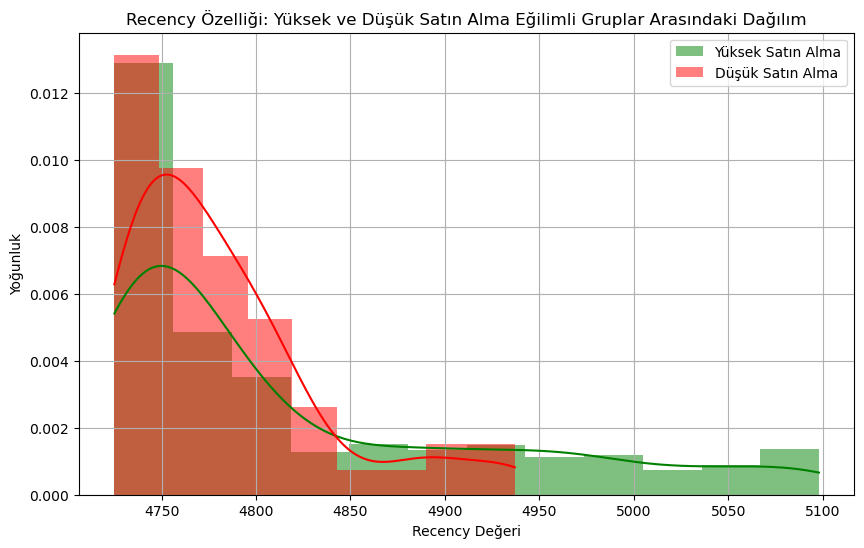

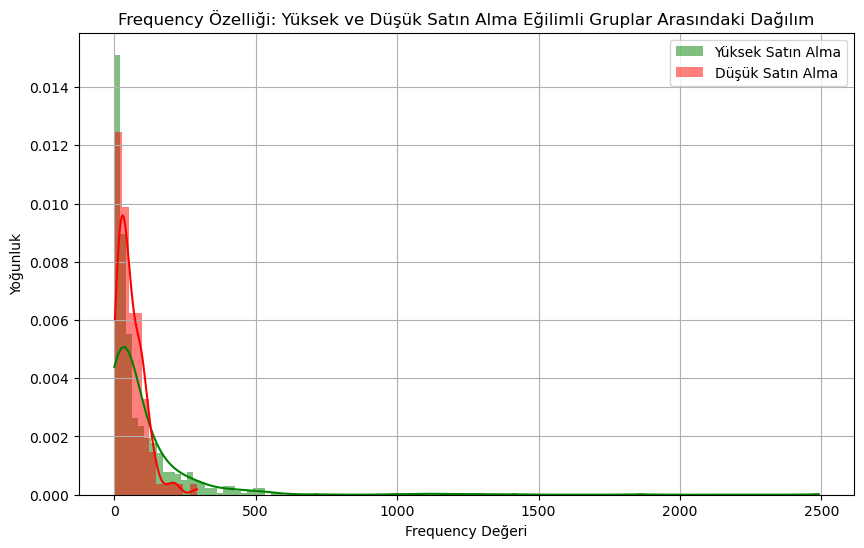

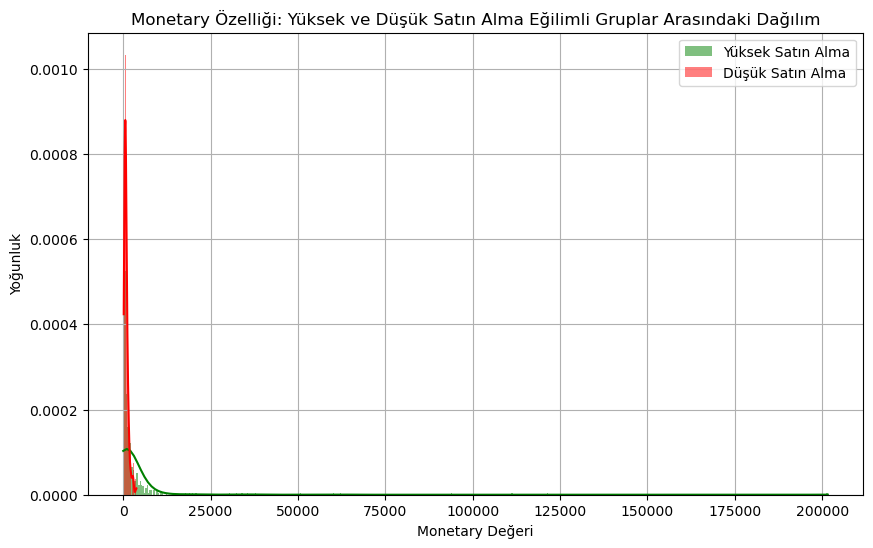

T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = 2.3092356380591608, p-değeri = 0.021195370766623027
T-test Sonucu: 'Recency' Özelliği için: t-istatistiği = 4.0577619472752735, p-değeri = 5.462062247004268e-05
T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = 2.3092356380591608, p-değeri = 0.021195370766623027
T-test Sonucu: 'Monetary' Özelliği için: t-istatistiği = 1.844086458716525, p-değeri = 0.06555604692632297


In [606]:
# Özellikler ve hedef değişkeni ayarlayın
X = merged_data_1[['Recency', 'Frequency', 'Monetary', 'Cluster', 'AverageDaysBetweenOrders']]
y = merged_data_1['Target']  # Target: 0 veya 1, düşük ya da yüksek satın alma eğilimi

# Eğitim ve test verilerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest modelini eğitme
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Modeli test etme
y_pred = rf_model.predict(X_test_scaled)

# Sonuçları değerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Test veri setine tahmin sonuçlarını ekleyelim
X_test['Predicted_Target'] = y_pred

# Test veri setine tahmin sonuçlarını ekleyelim
X_test['Predicted_Target'] = y_pred

# Yüksek ve düşük satın alma eğilimli grupları ayıralım
high_purchase_group = X_test[X_test['Predicted_Target'] == 1]
low_purchase_group = X_test[X_test['Predicted_Target'] == 0]

# Yüksek ve düşük satın alma eğilimli grupların temel istatistiklerini karşılaştıralım
high_purchase_stats = high_purchase_group.describe()
low_purchase_stats = low_purchase_group.describe()

print("Yüksek Satın Alma Eğilimli Grup İstatistikleri:")
print(high_purchase_stats)

print("\nDüşük Satın Alma Eğilimli Grup İstatistikleri:")
print(low_purchase_stats)

# Özellikleri karşılaştırmak için histogramlar çizelim
features_to_compare = ['Recency', 'Frequency', 'Monetary']

for feature in features_to_compare:
    plt.figure(figsize=(10,6))
    sns.histplot(high_purchase_group[feature], color='green', label='Yüksek Satın Alma', kde=True, stat="density", linewidth=0)
    sns.histplot(low_purchase_group[feature], color='red', label='Düşük Satın Alma', kde=True, stat="density", linewidth=0)
    plt.title(f'{feature} Özelliği: Yüksek ve Düşük Satın Alma Eğilimli Gruplar Arasındaki Dağılım')
    plt.xlabel(f'{feature} Değeri')
    plt.ylabel('Yoğunluk')
    plt.legend()
    plt.grid(True)
    plt.show()

# İstatistiksel test ile gruplar arasındaki farkı kontrol edelim (örneğin 'Frequency' üzerinde)
t_stat, p_value = ttest_ind(high_purchase_group['Frequency'], low_purchase_group['Frequency'])
print(f"T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = {t_stat}, p-değeri = {p_value}")

# Aynı işlemi diğer özellikler için de yapabiliriz
for feature in features_to_compare:
    t_stat, p_value = ttest_ind(high_purchase_group[feature], low_purchase_group[feature])
    print(f"T-test Sonucu: '{feature}' Özelliği için: t-istatistiği = {t_stat}, p-değeri = {p_value}")

Confusion Matrix:
[[485   0   0   0   0]
 [  0  89   1   0   0]
 [  0   1  78   1   0]
 [  0   0   2  70   0]
 [  0   0   0   0  42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       0.99      0.99      0.99        90
           2       0.96      0.97      0.97        80
           3       0.99      0.97      0.98        72
           4       1.00      1.00      1.00        42

    accuracy                           0.99       769
   macro avg       0.99      0.99      0.99       769
weighted avg       0.99      0.99      0.99       769

Yüksek Satın Alma Eğilimli Grup İstatistikleri:
       Recency_Score  Frequency_Score  Monetary_Score    Cluster  \
count      90.000000        90.000000       90.000000  90.000000   
mean        2.611111         3.766667        3.966667   1.000000   
std         1.242455         1.112240        0.999438   0.449719   
min         1.000000         1.00

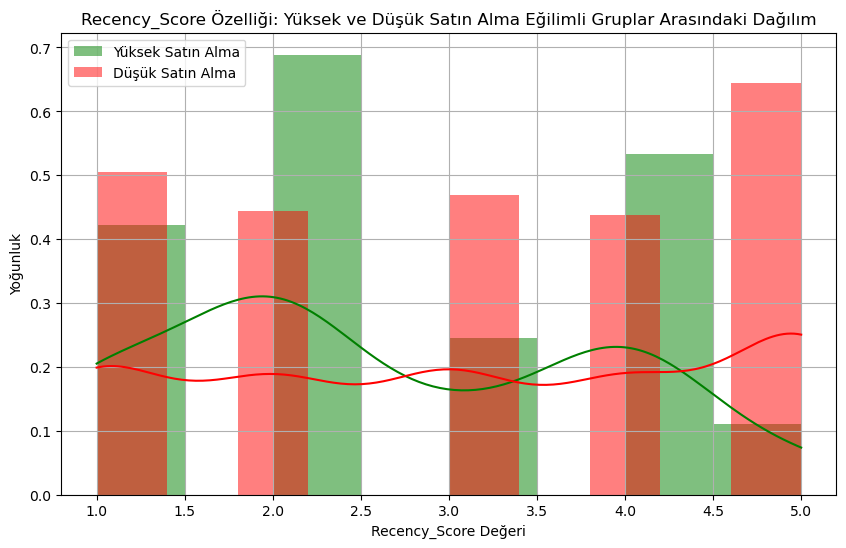

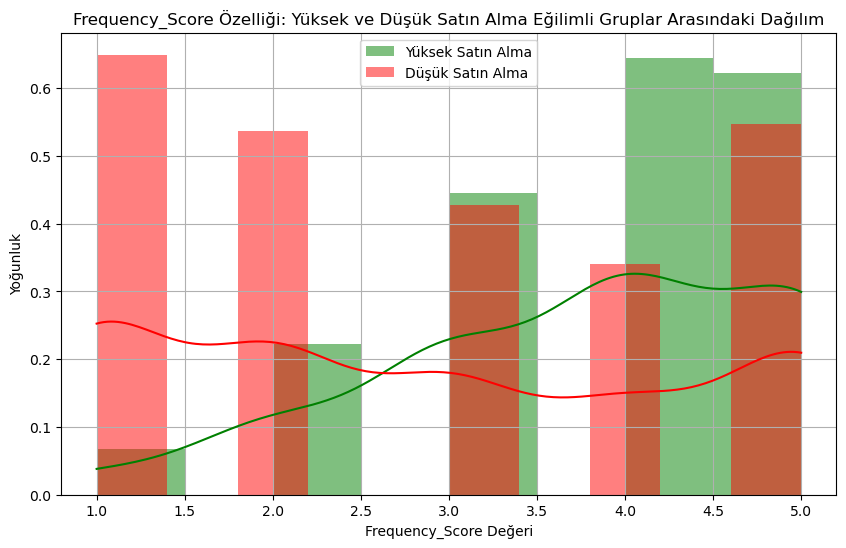

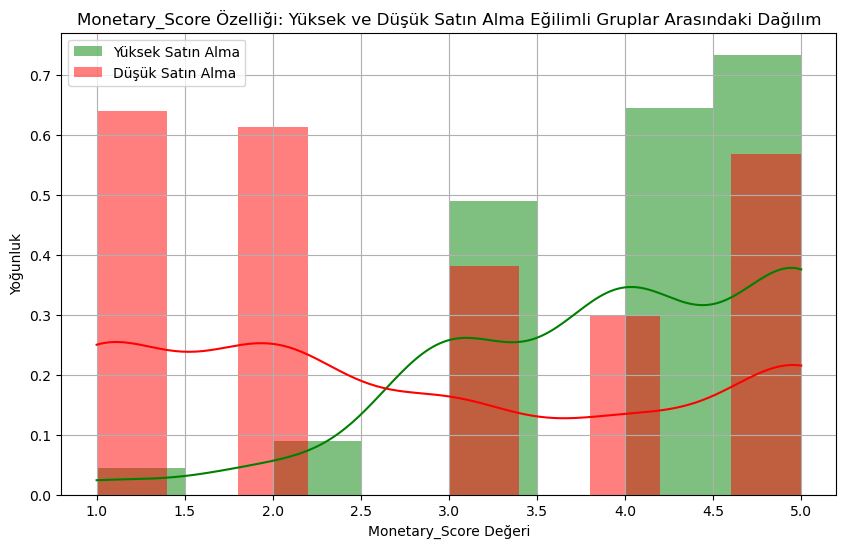

T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = 5.594490059052561, p-değeri = 3.431177493661196e-08
T-test Sonucu: 'Recency_Score' Özelliği için: t-istatistiği = -3.0060759008810085, p-değeri = 0.00276231807455563
T-test Sonucu: 'Frequency_Score' Özelliği için: t-istatistiği = 5.594490059052561, p-değeri = 3.431177493661196e-08
T-test Sonucu: 'Monetary_Score' Özelliği için: t-istatistiği = 6.966826484754664, p-değeri = 8.931898348414754e-12


In [605]:
# Özellikler ve hedef değişkeni ayarlayın
X = merged_data_2[['Recency_Score', 'Frequency_Score', 'Monetary_Score', 'Cluster', 'AverageDaysBetweenOrders']]
y = merged_data_2['Target']  # Target: 0 veya 1, düşük ya da yüksek satın alma eğilimi

# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost modelini oluşturma
xgb_model = xgb.XGBClassifier(random_state=42)

# Modeli eğitme
xgb_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = xgb_model.predict(X_test)

# Sonuçları değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Test veri setine tahmin sonuçlarını ekleyelim
X_test['Predicted_Target'] = y_pred

# Yüksek ve düşük satın alma eğilimli grupları ayıralım
high_purchase_group = X_test[X_test['Predicted_Target'] == 1]
low_purchase_group = X_test[X_test['Predicted_Target'] == 0]

# Yüksek ve düşük satın alma eğilimli grupların temel istatistiklerini karşılaştıralım
high_purchase_stats = high_purchase_group.describe()
low_purchase_stats = low_purchase_group.describe()

print("Yüksek Satın Alma Eğilimli Grup İstatistikleri:")
print(high_purchase_stats)

print("\nDüşük Satın Alma Eğilimli Grup İstatistikleri:")
print(low_purchase_stats)

# Özellikleri karşılaştırmak için histogramlar çizelim
features_to_compare = ['Recency_Score', 'Frequency_Score', 'Monetary_Score']

for feature in features_to_compare:
    plt.figure(figsize=(10,6))
    sns.histplot(high_purchase_group[feature], color='green', label='Yüksek Satın Alma', kde=True, stat="density", linewidth=0)
    sns.histplot(low_purchase_group[feature], color='red', label='Düşük Satın Alma', kde=True, stat="density", linewidth=0)
    plt.title(f'{feature} Özelliği: Yüksek ve Düşük Satın Alma Eğilimli Gruplar Arasındaki Dağılım')
    plt.xlabel(f'{feature} Değeri')
    plt.ylabel('Yoğunluk')
    plt.legend()
    plt.grid(True)
    plt.show()

# İstatistiksel test ile gruplar arasındaki farkı kontrol edelim (örneğin 'Frequency' üzerinde)
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(high_purchase_group['Frequency_Score'], low_purchase_group['Frequency_Score'])
print(f"T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = {t_stat}, p-değeri = {p_value}")

# Aynı işlemi diğer özellikler için de yapabiliriz
for feature in features_to_compare:
    t_stat, p_value = ttest_ind(high_purchase_group[feature], low_purchase_group[feature])
    print(f"T-test Sonucu: '{feature}' Özelliği için: t-istatistiği = {t_stat}, p-değeri = {p_value}")

In [ ]:
# Aynı modelleri monetary, recency ve frequency değerleri üzerinden oluşturalım

Confusion Matrix:
[[485   0   0   0   0]
 [  0  90   0   0   0]
 [  0   1  78   1   0]
 [  0   0   2  70   0]
 [  0   0   0   0  42]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       485
           1       0.99      1.00      0.99        90
           2       0.97      0.97      0.97        80
           3       0.99      0.97      0.98        72
           4       1.00      1.00      1.00        42

    accuracy                           0.99       769
   macro avg       0.99      0.99      0.99       769
weighted avg       0.99      0.99      0.99       769

Yüksek Satın Alma Eğilimli Grup İstatistikleri:
           Recency    Frequency      Monetary    Cluster  \
count    91.000000    91.000000     91.000000  91.000000   
mean   4779.835165   134.241758   1946.564725   1.000000   
std      57.586894   178.715686   1834.558875   0.447214   
min    4725.000000     3.000000     95.850000   0.000000   
25%  

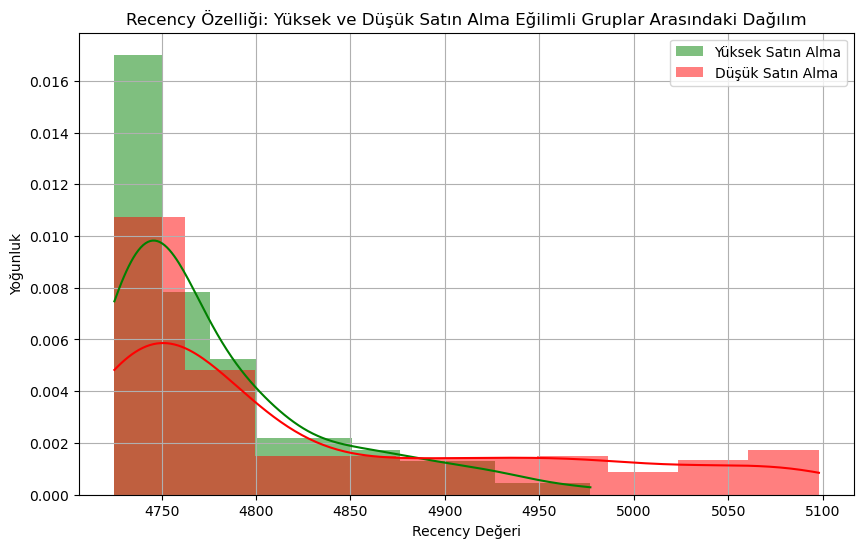

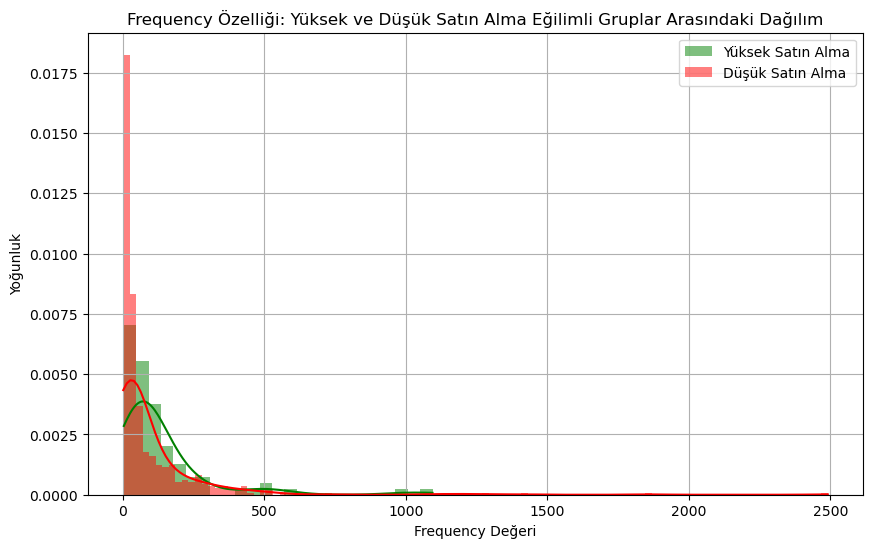

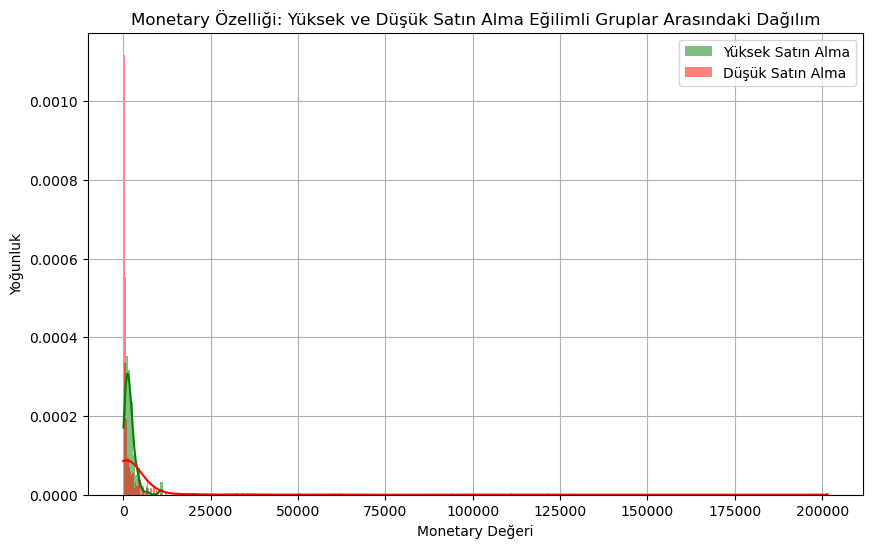

T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = 1.5188292403509598, p-değeri = 0.12935606733830915
T-test Sonucu: 'Recency' Özelliği için: t-istatistiği = -4.428577637355155, p-değeri = 1.1359772200103757e-05
T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = 1.5188292403509598, p-değeri = 0.12935606733830915
T-test Sonucu: 'Monetary' Özelliği için: t-istatistiği = -0.9628878883107347, p-değeri = 0.3360092474240389


In [607]:
# Özellikler ve hedef değişkeni ayarlayın
X = merged_data_2[['Recency', 'Frequency', 'Monetary', 'Cluster', 'AverageDaysBetweenOrders']]
y = merged_data_2['Target']  # Target: 0 veya 1, düşük ya da yüksek satın alma eğilimi

# Eğitim ve test verisine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost modelini oluşturma
xgb_model = xgb.XGBClassifier(random_state=42)

# Modeli eğitme
xgb_model.fit(X_train, y_train)

# Test verisiyle tahmin yapma
y_pred = xgb_model.predict(X_test)

# Sonuçları değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Test veri setine tahmin sonuçlarını ekleyelim
X_test['Predicted_Target'] = y_pred

# Yüksek ve düşük satın alma eğilimli grupları ayıralım
high_purchase_group = X_test[X_test['Predicted_Target'] == 1]
low_purchase_group = X_test[X_test['Predicted_Target'] == 0]

# Yüksek ve düşük satın alma eğilimli grupların temel istatistiklerini karşılaştıralım
high_purchase_stats = high_purchase_group.describe()
low_purchase_stats = low_purchase_group.describe()

print("Yüksek Satın Alma Eğilimli Grup İstatistikleri:")
print(high_purchase_stats)

print("\nDüşük Satın Alma Eğilimli Grup İstatistikleri:")
print(low_purchase_stats)

# Özellikleri karşılaştırmak için histogramlar çizelim
features_to_compare = ['Recency', 'Frequency', 'Monetary']

for feature in features_to_compare:
    plt.figure(figsize=(10,6))
    sns.histplot(high_purchase_group[feature], color='green', label='Yüksek Satın Alma', kde=True, stat="density", linewidth=0)
    sns.histplot(low_purchase_group[feature], color='red', label='Düşük Satın Alma', kde=True, stat="density", linewidth=0)
    plt.title(f'{feature} Özelliği: Yüksek ve Düşük Satın Alma Eğilimli Gruplar Arasındaki Dağılım')
    plt.xlabel(f'{feature} Değeri')
    plt.ylabel('Yoğunluk')
    plt.legend()
    plt.grid(True)
    plt.show()

# İstatistiksel test ile gruplar arasındaki farkı kontrol edelim (örneğin 'Frequency' üzerinde)
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(high_purchase_group['Frequency'], low_purchase_group['Frequency'])
print(f"T-test Sonucu: 'Frequency' Özelliği için: t-istatistiği = {t_stat}, p-değeri = {p_value}")

# Aynı işlemi diğer özellikler için de yapabiliriz
for feature in features_to_compare:
    t_stat, p_value = ttest_ind(high_purchase_group[feature], low_purchase_group[feature])
    print(f"T-test Sonucu: '{feature}' Özelliği için: t-istatistiği = {t_stat}, p-değeri = {p_value}")